In [ ]:
################################ Elastic Net with SMOTE-ENN ################################

In [ ]:
#### Uploading the dataset and make some changes ####

In [1]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')


In [2]:
# Show how to dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [3]:
#Drop the ID column, since it has no value to the models that need to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [4]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [6]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())

Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [7]:
from collections import Counter

# First we will see how the classes are divided.
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))

Original dataset shape Counter({0: 23364, 1: 6636})


In [9]:
# Now we will implement SMOTE-ENN to get the classes balanced again.
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
input_cols_res_ENN, target_col_res_ENN = smote_enn.fit_resample(input_cols, target_col)
print('Resampled dataset shape %s' % Counter(target_col_res_ENN))

Resampled dataset shape Counter({1: 15422, 0: 12129})


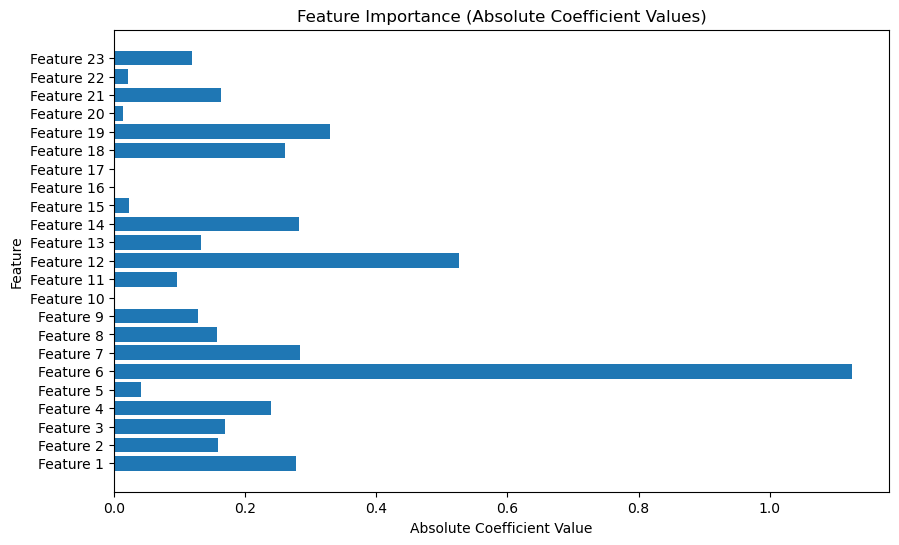

Classification Report:
               precision    recall  f1-score   support

           0   0.724955  0.701047  0.712801     12129
           1   0.770825  0.790818  0.780694     15422

    accuracy                       0.751298     27551
   macro avg   0.747890  0.745933  0.746747     27551
weighted avg   0.750632  0.751298  0.750805     27551

Best hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.5}


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='elasticnet', max_iter=1000000, solver='saga', random_state=42))

# Define outer and inner cross-validation folds
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters grid for grid search
param_grid = {
    'logisticregression__C': [0.1, 0.5, 1, 5, 10],  # Regularization strength
    'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # L1 ratio for elastic net regularization
}

# Perform nested cross-validation with grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='f1')
grid_search.fit(input_cols_res_ENN, target_col_res_ENN)

# Access the best estimator and its coefficients
best_estimator = grid_search.best_estimator_
coefficients = best_estimator.named_steps['logisticregression'].coef_[0]
feature_names = np.arange(len(coefficients))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, np.abs(coefficients))
plt.yticks(feature_names, [f'Feature {i+1}' for i in feature_names])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.show()

# Generate classification report
y_pred = cross_val_predict(grid_search, input_cols_res_ENN, target_col_res_ENN, cv=outer_cv)
report = classification_report(target_col_res_ENN, y_pred, digits=6)
print("Classification Report:\n", report)

best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

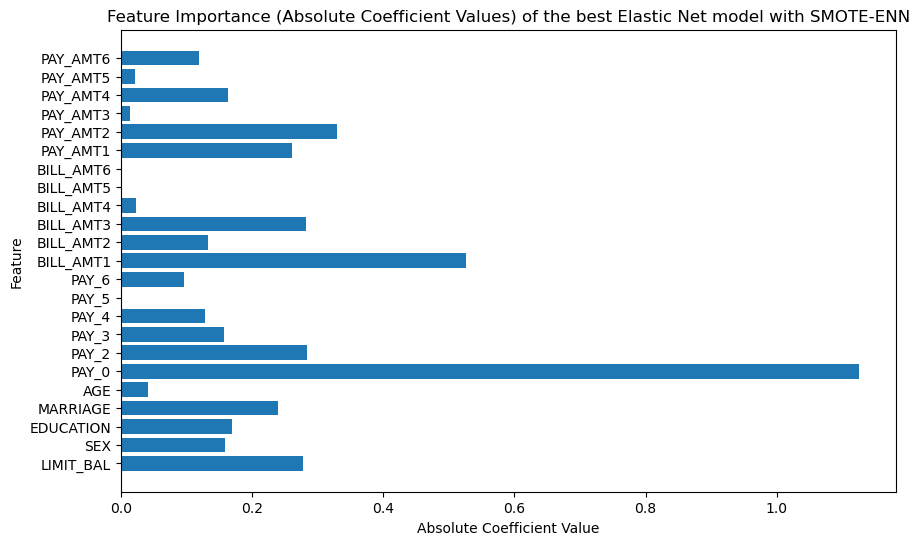

Classification Report:
               precision    recall  f1-score   support

           0   0.724955  0.701047  0.712801     12129
           1   0.770825  0.790818  0.780694     15422

    accuracy                       0.751298     27551
   macro avg   0.747890  0.745933  0.746747     27551
weighted avg   0.750632  0.751298  0.750805     27551

Best hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.5}


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='elasticnet', max_iter=1000000, solver='saga', random_state=42))

# Define outer and inner cross-validation folds
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters grid for grid search
param_grid = {
    'logisticregression__C': [0.1, 0.5, 1, 5, 10],  # Regularization strength
    'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # L1 ratio for elastic net regularization
}

# Perform nested cross-validation with grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='f1')
grid_search.fit(input_cols_res_ENN, target_col_res_ENN)

# Access the best estimator and its coefficients
best_estimator = grid_search.best_estimator_
coefficients = best_estimator.named_steps['logisticregression'].coef_[0]
feature_names = input_cols_res_ENN.columns  # Assuming input_cols is a DataFrame

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), np.abs(coefficients))
plt.yticks(range(len(coefficients)), feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Absolute Coefficient Values) of the best Elastic Net model with SMOTE-ENN')
plt.show()

# Generate classification report
y_pred = cross_val_predict(grid_search, input_cols_res_ENN, target_col_res_ENN, cv=outer_cv)
report = classification_report(target_col_res_ENN, y_pred, digits=6)
print("Classification Report:\n", report)

best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

In [39]:
from sklearn.model_selection import cross_val_score

# Perform nested cross-validation to get F1 scores
f1_scores = cross_val_score(grid_search, input_cols_res_ENN, target_col_res_ENN, cv=outer_cv, scoring='f1')

# Print F1 scores for each fold
for fold, f1_score in enumerate(f1_scores, start=1):
    print(f"F1 Score (Fold {fold}): {f1_score}")

# Optionally, you can also calculate and print the mean F1 score
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)

F1 Score (Fold 1): 0.7801030264005151
F1 Score (Fold 2): 0.7752790810548454
F1 Score (Fold 3): 0.7866921362623368
F1 Score (Fold 4): 0.7843883864826273
F1 Score (Fold 5): 0.7768911586338972
Mean F1 Score: 0.7806707577668444


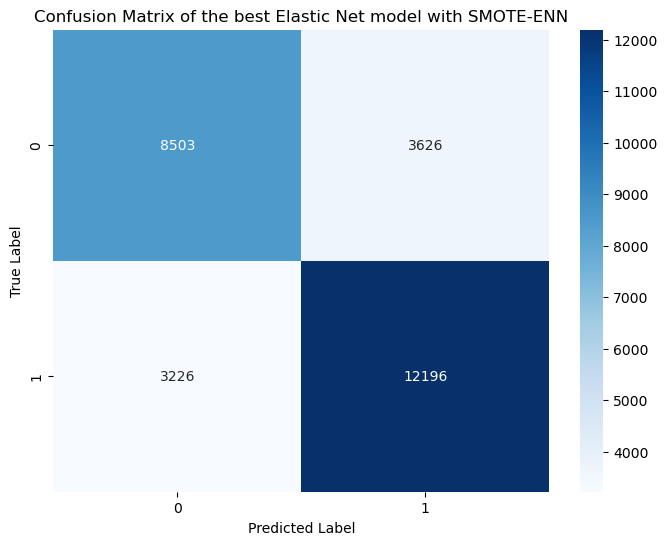

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best Elastic Net model with SMOTE-ENN")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col_res_ENN, y_pred)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")